In [5]:
#library(readr)
library(tidyverse)
library(stringr)
library(tableone)
library(readxl)

## Summary of cardiology department

e.g. from 2016-03-01 00:00:00 to 2016-03-31 23:59:59

1. innum: 入院患者数量（心一、心二、CCU）
2. transnum;transto: 转科患者数量及分布（心一、心二、CCU；心外科、内科、外科、妇产科）
4. 患者年龄分布
5. 患者性别分布
6. 患者既往病史情况（高血压、糖尿病、血脂异常、冠心病<心肌梗死、PCI、CABG>、心力衰竭、心律失常、脑血管病<脑梗、脑出血>、PAD、COPD、CKD<透析>、吸烟、饮酒、早发冠心病家族史）
7. CAG术数量
8. PCI术数量
9. 左心室造影数量
10. IABP数量
11. FFR数量
12. iVUS数量
13. 肾动脉造影数量
14. 急诊介入数量
15. 支架总数
16. 穿刺方式汇总（桡a、股a、肱a）
17. 放射剂量（平均曝光时间、平均曝光剂量、平均对比剂用量）
18. 闭合方式汇总（压迫器、angioseal、perclose、starclose、其他）

## Data source

1. CDR (cathpci.csv -> pci)
2. XperIM
3. Admission Notes (admissionnote.csv -> an)
4. EMR.in_patient (in_patient_after2015.csv -> df)

## Merge data

in_patient > admission notes > cdr
1. newdf <- Admission Notes left_join in_patient 
2. newpci <- CDR inner_join in_patient
3. fn <- newdf inner_join newpci

In [6]:
options(scipen = 50)
#Time period
rbegin_date=20150101000000
rend_date=20170401000000

In [7]:
#read data from csv
in_patient <- read.csv('D:/p/ehr/in_patient_after2015.csv',fileEncoding = "UTF-8-BOM")

In [8]:
df <- filter(in_patient,IN_HOS_DATETIME>=rbegin_date & IN_HOS_DATETIME< rend_date)
df <- select(df, IN_PATIENT_FLOW:DEPT_ID, BED_NUM)
# replace age into number
df$PATIENT_AGE <- as.numeric(str_replace(df$PATIENT_AGE, '\\D', ''))

In [9]:
cols <- c("IN_PATIENT_FLOW", "MR_ID", "PATIENT_NAME")
df[cols] <- lapply(df[cols], as.character)

In [10]:
summary(df)

 IN_PATIENT_FLOW       MR_ID           IN_HOS_DATETIME         
 Length:9821        Length:9821        Min.   :20150101023900  
 Class :character   Class :character   1st Qu.:20150722100500  
 Mode  :character   Mode  :character   Median :20160219093900  
                                       Mean   :20157257895600  
                                       3rd Qu.:20160829101300  
                                       Max.   :20170331182300  
                                                               
 OUT_HOS_DATETIME         PATIENT_NAME       PATIENT_SEX  PATIENT_AGE   
 Min.   :20150105151900   Length:9821        男:5780     Min.   : 0.00  
 1st Qu.:20150730091400   Class :character   女:4041     1st Qu.:55.00  
 Median :20160226083200   Mode  :character               Median :64.00  
 Mean   :20157395244500                                  Mean   :63.51  
 3rd Qu.:20160906081100                                  3rd Qu.:74.00  
 Max.   :20170427095300                             

In [62]:
#glimpse(select(df, 1:4,6:9))

In [12]:
#print table1
listVars <- c("PATIENT_SEX", "PATIENT_AGE")
#Define categorical variables
catVars <- c("PATIENT_SEX")
table1 <- CreateTableOne(listVars, df, catVars, strata = c("DEPT_ID"))
print(table1)

                         Stratified by DEPT_ID
                          CCUXN         N3            N4            p      test
  n                         465          5028          4328                    
  PATIENT_SEX = 女 (%)      161 (34.6)   2116 (42.1)   1764 (40.8)   0.006     
  PATIENT_AGE (mean (sd)) 69.92 (15.23) 62.97 (13.95) 63.46 (13.31) <0.001     


### Summary No. 1

第一个数据表，in_patient，也就是df，一共有9,821条数据，时间跨度从20150101到20170331。其中除了出院日期之外，没有缺失值。这是最基础的一个表。

如上表所示，也列出了心一（N4）、心二（N3）与CCU（CCUXN）三个科室收治患者数量、性别与年龄的统计。

In [13]:
#read admission note data from csv
admission_note <- read.csv('D:/p/ehr/admissionnote.csv',fileEncoding="UTF-8-BOM")
names(admission_note)

[1] "姓名"                     "社保号"                  
  [3] "身份证号"                 "无身份证号"              
  [5] "性别"                     "医院编码"                
  [7] "Patient_Index"            "注册编号"                
  [9] "门诊号"                   "住院号"                  
 [11] "患者编号"                 "其他身份识别码"          
 [13] "出生日期"                 "民族"                    
 [15] "年龄"                     "入院时间"                
 [17] "主诉"                     "现病史"                  
 [19] "高血压"                   "高血压诊断时间"          
 [21] "最高收缩压"               "最高舒张压"              
 [23] "高血压目前药物"           "血压控制情况"            
 [25] "血压控制具体情况"         "糖尿病"                  
 [27] "糖尿病诊断时间"           "糖尿病目前治疗"          
 [29] "空腹血糖控制情况"         "空腹血糖控制具体情况"    
 [31] "餐后血糖控制情况"         "餐后血糖控制具体情况"    
 [33] "血脂异常"                 "血脂异常诊断时间"        
 [35] "血脂异常目前药物"         "冠心病"                  
 [37] "心肌梗死"                 "心肌梗死首次起病时间"    
 [39] "心肌梗死首次起病具体时间" "CABG"                    
 [41] "CABG手术时间"             "CABG手术医院"            
 [43] "PCI"                      "手术时间1"               
 [45] "是否支架1"                "支架数量及血管1"         
 [47] "手术医院1"                "备注1"                   
 [49] "手术时间2"                "是否支架2"               
 [51] "支架数量及血管2"          "手术医院2"               
 [53] "备注2"                    "手术时间3"               
 [55] "是否支架3"                "支架数量及血管3"         
 [57] "手术医院3"                "备注3"                   
 [59] "心力衰竭"                 "心律失常"                
 [61] "心律失常具体类型"         "瓣膜病手术史"            
 [63] "脑血管病"                 "脑梗"                    
 [65] "脑梗发病时间"             "脑梗后遗留症状"          
 [67] "脑出血"                   "脑出血发病时间"          
 [69] "脑出血后遗留症状"         "外周动脉疾病"            
 [71] "外周动脉疾病部位"         "外周动脉疾病治疗"        
 [73] "COPD"                     "慢性肾病"                
 [75] "透析"                     "吸烟"                    
 [77] "吸烟时间.年."             "吸烟量.支."              
 [79] "吸烟量单位"               "是否戒烟"                
 [81] "饮酒"                     "饮酒时间.年."            
 [83] "饮酒量.两."               "饮酒量单位"              
 [85] "是否戒酒"                 "冠心病家族史"            
 [87] "早发冠心病家族史"         "体温"                    
 [89] "脉搏"                     "呼吸"                    
 [91] "左侧血压"                 "左侧舒张压"              
 [93] "左侧收缩压"               "右侧血压"                
 [95] "右侧舒张压"               "右侧收缩压"              
 [97] "BMI"                      "药物名称1"               
 [99] "开始时间1"                "用法用量1"               
[101] "备注1.1"                  "药物名称2"               
[103] "开始时间2"                "用法用量2"               
[105] "备注2.1"                  "药物名称3"               
[107] "开始时间3"                "用法用量3"               
[109] "备注3.1"                  "药物名称4"               
[111] "开始时间4"                "用法用量4"               
[113] "备注4"                    "药物名称5"               
[115] "开始时间5"                "用法用量5"               
[117] "备注5"                    "药物名称6"               
[119] "开始时间6"                "用法用量6"               
[121] "备注6"                    "药物名称7"               
[123] "开始时间7"                "用法用量7"               
[125] "备注7"                    "药物名称8"               
[127] "开始时间8"                "用法用量8"               
[129] "备注8"                    "药物名称9"               
[131] "开始时间9"                "用法用量9"               
[133] "备注9"                    "药物名称10"              
[135] "开始时间10"               "用法用量10"              
[137] "备注10"

In [14]:
#rename variables
names(admission_note) <- c('name','socialid','id','no_id','sex','hospitalid','Patient_Index','reg_id','outpatientid','IN_PATIENT_FLOW','MR_ID','other_id','birthday','people','age','in_hos_date','cc','hpi','htn','htn_time','sbp_max','dbp_max','htn_drug','htn_ctrl','htn_ctrl_detail','db','db_time','db_drug','db_fast_ctrl','db_fast_ctrl_detail','db_after','db_after_detail','dislp','dislp_time','dislp_drug','chd','mi','mi_time','mi_time_detail','CABG','CABG_time','CABG_hos','PCI','pci_one','stent_one','pci_one_detail','pci_one_hos','pci_one_note','pci_two','stent_two','pci_two_detail','pci_two_hos','pci_two_note','pci_three','stent_three','pci_three_detail','pci_three_hos','pci_three_note','hf','arrhth','arrhth_type','valve','stroke','stroke_ischemia','stroke_ischemia_time','stroke_ischemia_sym','stroke_bleed','stroke_bleed_time','stroke_bleed_sym','pad','pad_position','pad_therapy','COPD','ckd','dialyse','smoke','smoke_time','smoke_amount','smoke_unite','smoke_stop','drink','drink_time','drink_amount','drink_unite','drink_stop','chd_history','pre_chd_history','temp','pulse','resp','bp_left','dbp_left','sbp_left','bp_right','dbp_right','sbp_right','BMI','drug1','begin1','dose1','note1','drug2','begin2','dose2','note2','drug3','begin3','dose3','note3','drug4','begin4','dose4','note4','drug5','begin5','dose5','note5','drug6','begin6','dose6','note6','drug7','begin7','dose7','note7','drug8','begin8','dose8','note8','drug9','begin9','dose9','note9', 'drug10','begin10','dose10','note10')

In [15]:
an <- select(admission_note, MR_ID,IN_PATIENT_FLOW,birthday,cc,htn,db,dislp,chd,mi,CABG,PCI,hf,arrhth,valve,stroke,stroke_ischemia,stroke_bleed,pad,COPD,ckd,dialyse,smoke,drink,pre_chd_history,pulse,bp_left,bp_right,BMI)
an[an==""]<-NA
# replace age into number
an <- filter(an,cc!="")

In [16]:
cols <- c("pulse", "BMI")
an[cols] <- lapply(an[cols], function(x) as.numeric(as.character(x)))
cols <- c("MR_ID", "IN_PATIENT_FLOW", "cc")
an[cols] <- lapply(an[cols], as.character)
newdf <- an %>% inner_join(df, by=c("IN_PATIENT_FLOW", "MR_ID"))
#levels(an$htn)
#summary(newdf)

Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"Warning message in FUN(X[[i]], ...):
"强制改变过程中产生了NA"

In [17]:
newdf <- separate(newdf, "bp_left", c("sbp_left","dbp_left"), sep="/",extra = "drop", fill = "right")
newdf <- separate(newdf, "bp_right", c("sbp_right","dbp_right"), sep="/",extra = "drop", fill = "right")

In [18]:
cols <- c("sbp_left","dbp_left","sbp_right","dbp_right")
newdf[cols] <- lapply(newdf[cols], as.integer)

Warning message in lapply(newdf[cols], as.integer):
"强制改变过程中产生了NA"Warning message in lapply(newdf[cols], as.integer):
"强制改变过程中产生了NA"Warning message in lapply(newdf[cols], as.integer):
"强制改变过程中产生了NA"Warning message in lapply(newdf[cols], as.integer):
"强制改变过程中产生了NA"

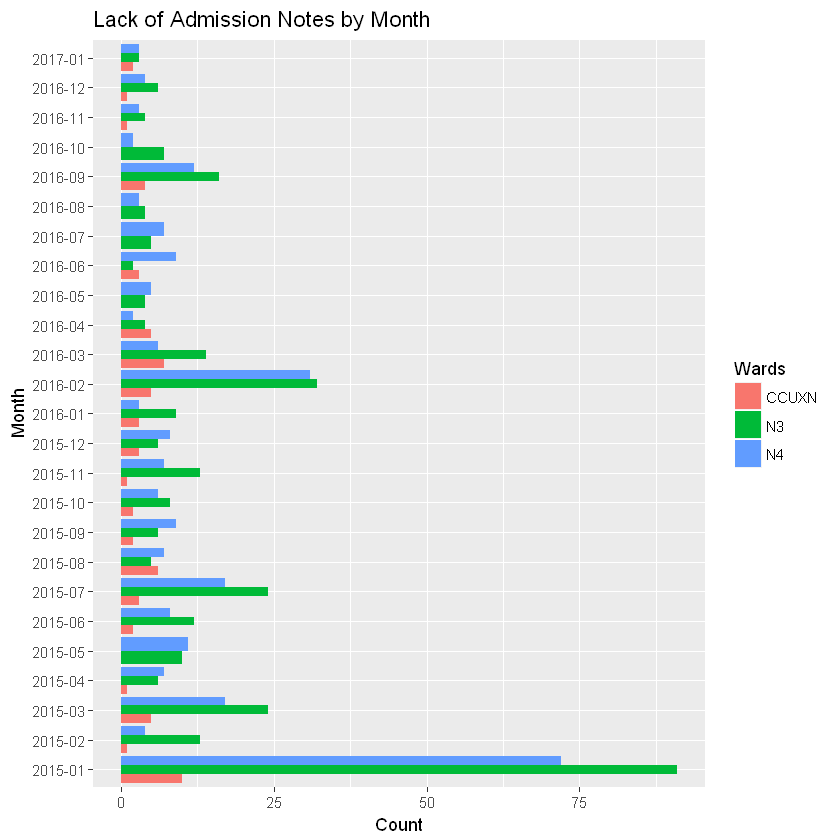

In [19]:
noadmissionnote <- anti_join(df,an,by="IN_PATIENT_FLOW")
ggplot(data = filter(noadmissionnote, IN_HOS_DATETIME < 20170201000000)) + 
  geom_bar(
      mapping = aes(
          x = format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y-%m"),
          fill=DEPT_ID
          ),
      position = "dodge")+
  labs(title="Lack of Admission Notes by Month", x = "Month", y="Count", fill="Wards")+
  coord_flip()

In [20]:
summary(newdf)

    MR_ID           IN_PATIENT_FLOW         birthday         cc           
 Length:9297        Length:9297        1941/1/28:  55   Length:9297       
 Class :character   Class :character   1942/6/18:  34   Class :character  
 Mode  :character   Mode  :character   1927/3/22:  29   Mode  :character  
                                       1932/4/10:  15                     
                                       1940/3/31:  13                     
                                       1929/6/27:  11                     
                                       (Other)  :9140                     
       htn              db            dislp            chd          mi      
         :   0           :   0           :   0           :   0       :   0  
 见现病史: 433   见现病史:   9   见现病史:  75   见现病史:3695   无  : 908  
 无      :2940   无      :6238   无      :4305   无      :3951   有  : 652  
 有      :5857   有      :2971   有      :4831   有      :1567   NA's:7737  
 NA's    :  67   NA's    :  79   NA's    

In [21]:
#print table1
listVars <- c("PATIENT_SEX","PATIENT_AGE","htn","db","dislp","chd","mi","CABG","PCI","hf","arrhth","valve","stroke","stroke_ischemia","stroke_bleed","pad","COPD","ckd","dialyse","smoke","drink","pre_chd_history","pulse","BMI")
#Define categorical variables
catVars <- c("PATIENT_SEX","htn","db","dislp","chd","mi","CABG","PCI","hf","arrhth","valve","stroke","stroke_ischemia","stroke_bleed","pad","COPD","ckd","dialyse","smoke","drink","pre_chd_history")
table2 <- CreateTableOne(vars=listVars, data=newdf, factorVars=catVars, strata = c("DEPT_ID"))
print(table2, exact = "ascites", quote = TRUE)

                            "Stratified by DEPT_ID"
 ""                          "CCUXN"         "N3"            "N4"           
  "n"                        "  401"         " 4786"         " 4110"        
  "PATIENT_SEX = 女 (%)"     "  139 (34.7) " " 2016 (42.1) " " 1683 (40.9) "
  "PATIENT_AGE (mean (sd))"  "71.10 (14.06)" "62.98 (13.88)" "63.46 (13.22)"
  "htn (%)"                  "  "            " "             " "            
  "   见现病史"              "    3 ( 0.8) " "  204 ( 4.3) " "  226 ( 5.5) "
  "   无"                    "  124 (31.3) " " 1633 (34.5) " " 1183 (28.9) "
  "   有"                    "  269 (67.9) " " 2898 (61.2) " " 2690 (65.6) "
  "db (%)"                   "  "            " "             " "            
  "   见现病史"              "    0 ( 0.0) " "    6 ( 0.1) " "    3 ( 0.1) "
  "   无"                    "  246 (62.1) " " 3282 (69.4) " " 2710 (66.2) "
  "   有"                    "  150 (37.9) " " 1439 (30.4) " " 1382 (33.7) "
  "dislp (%)"                "  "    

### Summary No. 2

第二个数据表，admission note也就是an，是入院记录数据。

经过与df合并（根据"IN_PATIENT_FLOW"与"MR_ID"），共得到8,991条数据，时间跨度。其中有1006条没有入院记录数据（可见上图的月份分布，基本各月都比较平均）。

该表是包含患者基础信息、既往病史的数据。

In [22]:
#read cathpci note data from csv
cathpci <- read.csv('D:/p/ehr/cathpci.csv',fileEncoding="UTF-8-BOM")
names(cathpci)

[1] "CathPCI_Data_Dic_OID"                           
  [2] "患者编号"                                       
  [3] "姓名"                                           
  [4] "身份证号"                                       
  [5] "无身份证号"                                     
  [6] "其他身份标识码"                                 
  [7] "出生日期"                                       
  [8] "性别"                                           
  [9] "民族"                                           
 [10] "门诊号"                                         
 [11] "住院号"                                         
 [12] "社保号"                                         
 [13] "到达日期"                                       
 [14] "患者现住址"                                     
 [15] "住址未知"                                       
 [16] "住院来源"                                       
 [17] "支付方式"                                       
 [18] "手术类别"                                       
 [19] "正在吸烟.近期吸烟史..1年."                      
 [20] "高血压"                                         
 [21] "血脂异常"                                       
 [22] "肾功能衰竭"                                     
 [23] "冠心病家族史"                                   
 [24] "早发冠心病家族史"                               
 [25] "心肌梗死史"                                     
 [26] "心力衰竭史"                                     
 [27] "瓣膜手术史"                                     
 [28] "最近瓣膜手术日期"                               
 [29] "PCI史"                                          
 [30] "最近进行PCI治疗日期"                            
 [31] "CABG史"                                         
 [32] "最近进行CABG日期"                               
 [33] "身高.cm."                                       
 [34] "体重.kg."                                       
 [35] "正在进行透析"                                   
 [36] "脑血管病"                                       
 [37] "出血性脑血管疾病"                               
 [38] "外周血管疾病"                                   
 [39] "慢性肺病"                                       
 [40] "糖尿病"                                         
 [41] "使用的糖尿病治疗方案"                           
 [42] "收缩压"                                         
 [43] "舒张压"                                         
 [44] "心率"                                           
 [45] "临床表现"                                       
 [46] "无症状性心肌缺血最近一次诊断.症状发作.日期.时间"
 [47] "无症状性心肌缺血最近一次诊断.症状发作.估计时间" 
 [48] "无症状性心肌缺血最近一次诊断.症状发作.时间未知" 
 [49] "稳定型心绞痛最近一次诊断.症状发作.日期.时间"    
 [50] "稳定型心绞痛最近一次诊断.症状发作.估计时间"     
 [51] "稳定型心绞痛最近一次诊断.症状发作.时间未知"     
 [52] "不稳定型心绞痛最近一次诊断.症状发作.日期.时间"  
 [53] "不稳定型心绞痛最近一次诊断.症状发作.估计时间"   
 [54] "不稳定型心绞痛最近一次诊断.症状发作.时间未知"   
 [55] "Non.STEMI症状发作日期.时间"                     
 [56] "Non.STEMI症状发作是否为估计时间"                
 [57] "Non.STEMI症状发作是否为时间未知"                
 [58] "STEMI症状发作日期.时间"                         
 [59] "STEMI症状发作是否为估计时间"                    
 [60] "STEMI症状发作是否为时间未知"                    
 [61] "STEMI首次医疗接触时间"                          
 [62] "STEMI是否进行溶栓治疗"                          
 [63] "STEMI心功能Killip分级"                          
 [64] "不典型胸痛最近一次诊断.症状发作.日期.时间"      
 [65] "不典型胸痛最近一次诊断.症状发作.估计时间"       
 [66] "不典型胸痛最近一次诊断.症状发作.时间未知"       
 [67] "可疑心绞痛最近一次诊断.症状发作.日期.时间"      
 [68] "可疑心绞痛最近一次诊断.症状发作.估计时间"       
 [69] "可疑心绞痛最近一次诊断.症状发作.时间未知"       
 [70] "溶栓治疗开始治疗日期"                           
 [71] "X2周内心绞痛分级"                               
 [72] "X2周内抗心绞痛药物治疗"                         
 [73] "X2周内抗心绞痛药物治疗.药物类型"                
 [74] "X2周内心衰"                                     
 [75] "X2周内NYHA心功能分级"                           
 [76] "心肌病或左室收缩功能不全"                       
 [77] "X24小时内心源性休克"                            
 [78] "非心脏手术术前评估"                             
 [79] "X24小时内心脏骤停"                              
 [80] "进行负荷试验或成像检查"                         
 [81] "标准运动负荷试验.含或不含成像检查."             
 [82] "标准运动负荷试验检查结果"                       
 [83] "标准运动负荷试验缺血风险.程度"                  
 [84] "负荷超声心动图"                                 
 [85] "负荷超声心动图检查结果"       

In [23]:
#pci <- select(cathpci, 1:200)
pci <- select(cathpci, 2,10,11,13,33,34,45,97,98,99,100,101,115,120)
#names(pci)
#rename variables
names(pci) <- c('MR_ID', 'outpatient_id', 'IN_PATIENT_FLOW', 'in_hos_date', 'height', 'weight', 'chd_type', 'procedure_date', 'x_time', 'x_dose', 'pci', 'contrast_volume', 'lv_angio', 'conclusion')

In [24]:
pci %>%
  group_by(nchar(as.character(IN_PATIENT_FLOW))) %>%
  summarise(innum = n())

nchar(as.character(IN_PATIENT_FLOW)),innum
0,3012
7,6
8,486
9,2
10,3141


这里做一点解释。

因为CDR里cathpci的数据，“患者编号”这一列，也就是最关键的IN_PATIENT_FLOW，中间数次变化，因此不甚一致。所以看了一下这一列编号的位数变化与分布情况。最终可以看到，从13年之后的某个时间点开始，就是10位正确的IN_PATIENT_FLOW了。而admission note是2015年之后才有的，所以按道理上，并不会影响cathPCI数据表中的合并。

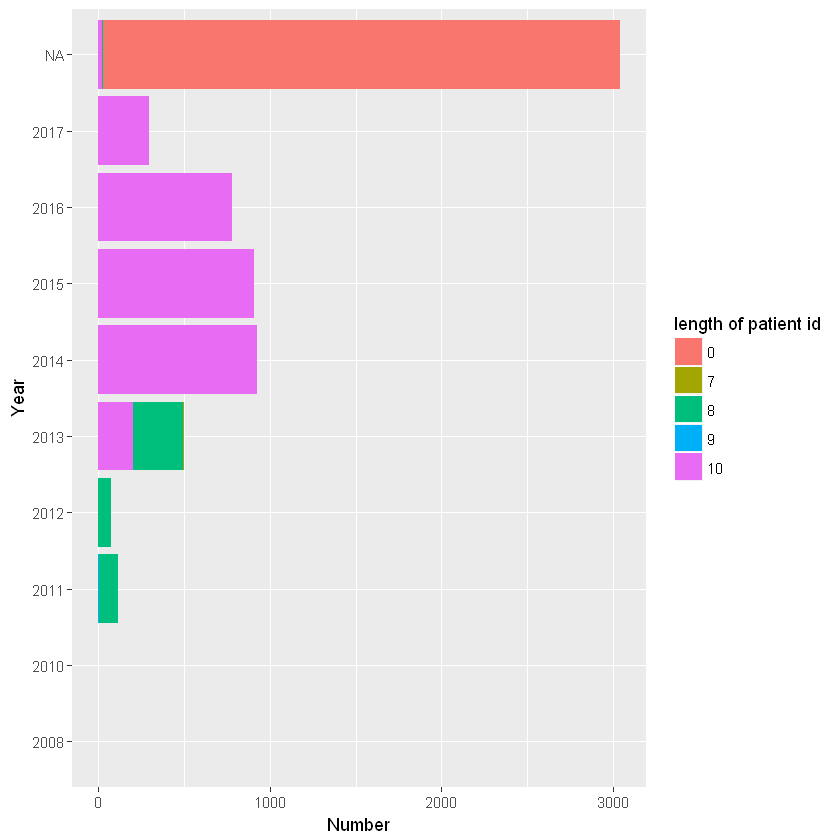

In [25]:
ggplot(data = pci) + 
  geom_bar(
      mapping = aes(x = format(as.Date(in_hos_date), "%Y") , 
      fill=as.factor(nchar(as.character(IN_PATIENT_FLOW))))
  )+
  labs(x = "Year", y="Number", fill = "length of patient id")+
  coord_flip()

In [26]:
newpci <- pci %>% inner_join(newdf, by=c("IN_PATIENT_FLOW","MR_ID"))

Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
"joining factor and character vector, coercing into character vector"Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
"joining factor and character vector, coercing into character vector"

In [28]:
#glimpse(newpci)

In [29]:
summary(newpci)

    MR_ID                outpatient_id  IN_PATIENT_FLOW   
 Length:1792                    :1792   Length:1792       
 Class :character   0000224020MZ:   0   Class :character  
 Mode  :character   113201651004:   0   Mode  :character  
                    113613132008:   0                     
                    115551515001:   0                     
                                                          
                                                          
             in_hos_date       height          weight     
                   :  20   Min.   : 78.0   Min.   : 40.0  
 2015/8/18 13:45:00:   8   1st Qu.:160.0   1st Qu.: 65.0  
 2015/8/19 10:32:00:   5   Median :168.0   Median : 72.8  
 2015/8/18 10:47:00:   4   Mean   :167.6   Mean   : 73.1  
 2015/8/18 14:57:00:   3   3rd Qu.:173.0   3rd Qu.: 80.0  
 2015/8/19 8:54:00 :   3   Max.   :764.0   Max.   :174.0  
 (Other)           :1749   NA's   :211     NA's   :357    
                   chd_type              procedure_date 

In [30]:
newpci %>%
  group_by(format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y")) %>%
  summarise(mean_age = mean(PATIENT_AGE),age_std = sd(PATIENT_AGE), innum = n())

format(as.Date(as.character(format(IN...,mean_age,age_std,innum
2015,64.03356,10.81414,864
2016,62.98628,10.52978,729
2017,62.85427,10.36378,199


In [31]:
pci %>%
  group_by(format(as.Date(in_hos_date), "%Y")) %>%
  summarise(innum = n())

"format(as.Date(in_hos_date), ""%Y"")",innum
2008,2
2010,2
2011,117
2012,73
2013,499
2014,926
2015,907
2016,782
2017,299
NA,3040


In [32]:
dim(pci)

[1] 6647   14

In [33]:
newdf %>%
  group_by(format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y")) %>%
  summarise(innum = n())

format(as.Date(as.character(format(IN...,innum
2015,4047
2016,4275
2017,975


In [34]:
lis_sample <- read_csv("D:/p/ehr/lis_sample.csv")

Warning message:
"Duplicated column names deduplicated: 'OUTPATIENT_ID' => 'OUTPATIENT_ID_1' [3]"Parsed with column specification:
cols(
  INSPECTION_ID = col_character(),
  OUTPATIENT_ID = col_character(),
  OUTPATIENT_ID_1 = col_character(),
  INPATIENT_ID = col_character(),
  PATIENT_NAME = col_character(),
  PATIENT_SEX = col_integer(),
  AGE_INPUT = col_character(),
  PATIENT_DEPT = col_character(),
  PATIENT_BED = col_character(),
  SAMPLE_CLASS_NAME = col_character(),
  TEST_ORDER_NAME = col_character(),
  SAMPLING_TIME = col_character(),
  CHECK_TIME = col_character(),
  INSERT_TIME = col_character()
)


In [35]:
lis_sample <- select(lis_sample, 1:4,8,10:14)
lis_sample$SAMPLE_CLASS_NAME <- iconv(lis_sample$SAMPLE_CLASS_NAME,"gb2312","UTF-8")
lis_sample$TEST_ORDER_NAME <- iconv(lis_sample$TEST_ORDER_NAME,"gb2312","UTF-8")

In [36]:
cols <- c("SAMPLE_CLASS_NAME","TEST_ORDER_NAME")
lis_sample[cols] <- lapply(lis_sample[cols], as.factor)

In [37]:
#glimpse(lis_sample)

In [38]:
summary(lis_sample)

 INSPECTION_ID      OUTPATIENT_ID      OUTPATIENT_ID_1    INPATIENT_ID      
 Length:146807      Length:146807      Length:146807      Length:146807     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 PATIENT_DEPT       SAMPLE_CLASS_NAME            TEST_ORDER_NAME 
 Length:146807      血清    :59563    出凝血功能筛查1    :12083  
 Class :character   静脉全血:37921    全血细胞五分类     :11990  
 Mode  :character   尿液    :18180    尿液全项           :11230  
                    血浆    :15068    粪便常规+双法便潜血:10796  
                    粪便    :11574    血沉               : 9355  
                    (Other) :

In [39]:
lis_result <- read_csv("D:/p/ehr/lis_result.csv")

Parsed with column specification:
cols(
  INSPECTION_ID = col_character(),
  ENGLISH_NAME = col_character(),
  CHINESE_NAME = col_character(),
  QUANTITATIVE_RESULT = col_character(),
  QUALITATIVE_RESULT = col_character(),
  TEST_ITEM_REFERENCE = col_character(),
  TEST_ITEM_UNIT = col_character()
)


In [40]:
lis_result$CHINESE_NAME <- iconv(lis_result$CHINESE_NAME,"gb2312","UTF-8")
lis_result$QUANTITATIVE_RESULT <- iconv(lis_result$QUANTITATIVE_RESULT,"gb2312","UTF-8")
lis_result$QUALITATIVE_RESULT <- iconv(lis_result$QUALITATIVE_RESULT,"gb2312","UTF-8")

In [41]:
cols <- c("ENGLISH_NAME","CHINESE_NAME","QUALITATIVE_RESULT")
lis_result[cols] <- lapply(lis_result[cols], as.factor)

In [42]:
glimpse(lis_result)

Observations: 2,008,797
Variables: 7
$ INSPECTION_ID       <chr> "20150109G0020623", "20150109G0040502", "201501...
$ ENGLISH_NAME        <fctr> ESR, NA, NA, NA, NA, HXFYX, MYFYX, NA, NA, NA,...
$ CHINESE_NAME        <fctr> 红细胞沉降率, 颜色, 粪便常规, 硬度, 镜检, 化学法隐血, 免疫法隐血, 硬度, 粪便...
$ QUANTITATIVE_RESULT <chr> "55", "黄色", NA, "软便", "未见异常", "阴性", "阴性", "软便",...
$ QUALITATIVE_RESULT  <fctr> h, z, NA, z, NA, z, z, z, NA, z, NA, z, z, NA,...
$ TEST_ITEM_REFERENCE <chr> "0-20", NA, NA, NA, NA, "\xd2\xf5\xd0\xd4", "\x...
$ TEST_ITEM_UNIT      <chr> "mm/h", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...


In [43]:
summary(lis_result)

 INSPECTION_ID       ENGLISH_NAME         CHINESE_NAME     QUANTITATIVE_RESULT
 Length:2008797     PA     :  30884   钾        :  28442   Length:2008797     
 Class :character   K*     :  28442   钠        :  28371   Class :character   
 Mode  :character   NA*    :  28371   氯        :  28370   Mode  :character   
                    CL*    :  28370   阴离子间隙:  28368                      
                    CO2    :  28369   尿素      :  27772                      
                    (Other):1736503   (Other)   :1867391                      
                    NA's   : 127858   NA's      :     83                      
 QUALITATIVE_RESULT TEST_ITEM_REFERENCE TEST_ITEM_UNIT    
 z      :1514170    Length:2008797      Length:2008797    
 h      : 224023    Class :character    Class :character  
 l      : 133128    Mode  :character    Mode  :character  
 阴性   :  60886                                          
 陽性   :   9123                                          
 (Other):   7066            

In [44]:
xperim <- read_excel("D:/p/ehr/xperim.xls")

fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904


Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [2548, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [2549, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [5433, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [5434, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [5954, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [5955, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [7436, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names

In [45]:
#glimpse(xperim)

In [46]:
xperim <- select(xperim,3:9,Begin_Time,End_Time)

In [47]:
summary(xperim)

    Case_No          MRN                 EMPI       Patient_ID       
 Min.   : 4370   Length:8761        Min.   : NA    Length:8761       
 1st Qu.: 6440   Class :character   1st Qu.: NA    Class :character  
 Median : 8354   Mode  :character   Median : NA    Mode  :character  
 Mean   : 8374                      Mean   :NaN                      
 3rd Qu.:10341                      3rd Qu.: NA                      
 Max.   :12447                      Max.   : NA                      
                                    NA's   :8761                     
   Admit_Date                  Procedure_Date                Procedure_Name
 Min.   :2014-12-30 13:58:15   Min.   :2015-01-03 00:00:00   Min.   : NA   
 1st Qu.:2015-08-07 08:14:32   1st Qu.:2015-08-08 00:00:00   1st Qu.: NA   
 Median :2016-03-09 16:42:56   Median :2016-03-11 00:00:00   Median : NA   
 Mean   :2016-03-01 18:33:50   Mean   :2016-03-02 10:42:39   Mean   :NaN   
 3rd Qu.:2016-09-23 13:04:14   3rd Qu.:2016-09-26 00:00:00  

In [48]:
#head(xperim)

In [49]:
#filter(df, MR_ID=="")

In [50]:
tmp <- inner_join(xperim, df, by = c("Patient_ID" = "MR_ID"))

In [51]:
summary(tmp)

    Case_No          MRN                 EMPI       Patient_ID       
 Min.   : 4371   Length:9292        Min.   : NA    Length:9292       
 1st Qu.: 6336   Class :character   1st Qu.: NA    Class :character  
 Median : 8133   Mode  :character   Median : NA    Mode  :character  
 Mean   : 8185                      Mean   :NaN                      
 3rd Qu.:10064                      3rd Qu.: NA                      
 Max.   :12444                      Max.   : NA                      
                                    NA's   :9292                     
   Admit_Date                  Procedure_Date                Procedure_Name
 Min.   :2015-01-03 16:20:12   Min.   :2015-01-04 00:00:00   Min.   : NA   
 1st Qu.:2015-07-27 10:48:16   1st Qu.:2015-07-28 00:00:00   1st Qu.: NA   
 Median :2016-02-22 11:09:19   Median :2016-02-23 00:00:00   Median : NA   
 Mean   :2016-02-10 22:28:21   Mean   :2016-02-11 15:26:43   Mean   :NaN   
 3rd Qu.:2016-08-19 11:36:56   3rd Qu.:2016-08-22 00:00:00  

In [52]:
tmp <- filter(tmp, (as.Date(Procedure_Date)>=as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"))&(as.Date(Procedure_Date)<=as.Date(as.character(format(OUT_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S")))

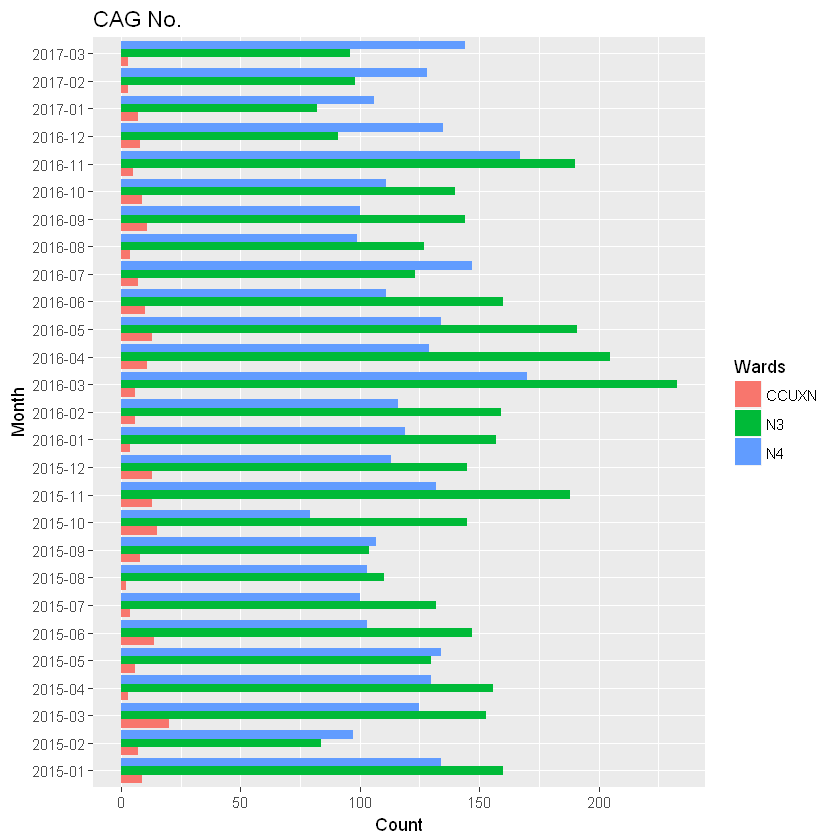

In [53]:
ggplot(data = tmp) + 
  geom_bar(
      mapping = aes(
          x = format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y-%m"),
          fill=DEPT_ID
          ),
      position = "dodge")+
  labs(title="CAG No.", x = "Month", y="Count", fill="Wards")+
  coord_flip()

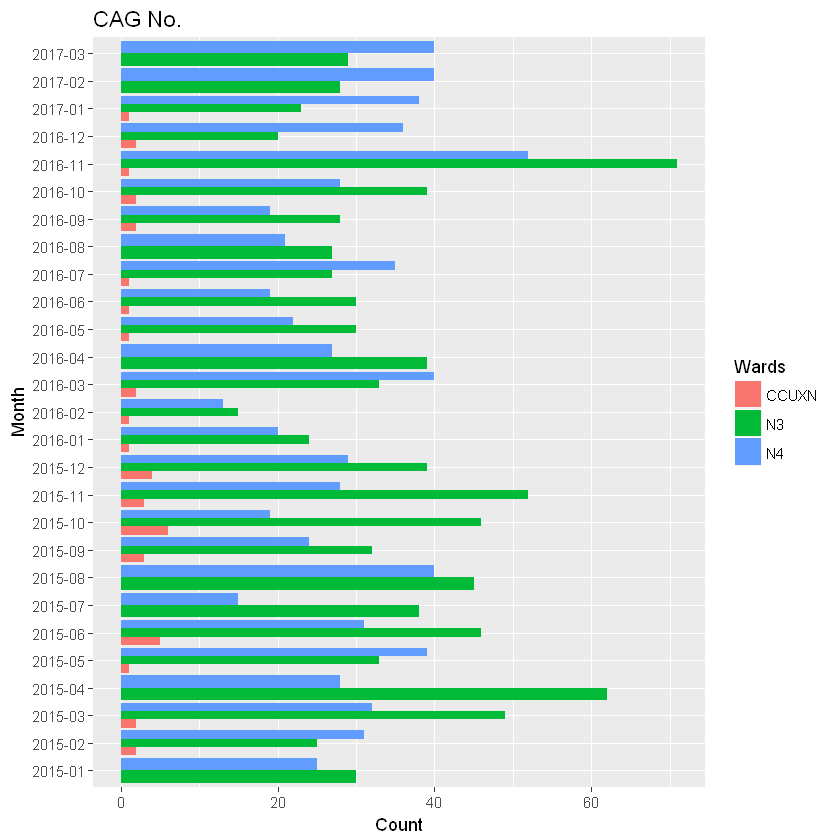

In [54]:
ggplot(data = newpci) + 
  geom_bar(
      mapping = aes(
          x = format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y-%m"),
          fill=DEPT_ID
          ),
      position = "dodge")+
  labs(title="CAG No.", x = "Month", y="Count", fill="Wards")+
  coord_flip()

In [55]:
newpci %>%
  group_by(format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y")) %>%
  summarise(mean_age = mean(PATIENT_AGE),age_std = sd(PATIENT_AGE), innum = n())
tmp %>%
  group_by(format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y")) %>%
  summarise(mean_age = mean(PATIENT_AGE),age_std = sd(PATIENT_AGE), innum = n())

format(as.Date(as.character(format(IN...,mean_age,age_std,innum
2015,64.03356,10.81414,864
2016,62.98628,10.52978,729
2017,62.85427,10.36378,199


format(as.Date(as.character(format(IN...,mean_age,age_std,innum
2015,63.90112,10.77040,3125
2016,63.61458,10.90451,3552
2017,63.42429,10.81547,667


In [56]:
filter(newpci, IN_HOS_DATETIME>20170101000000) %>%
  group_by(format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y-%m")) %>%
  summarise(mean_age = mean(PATIENT_AGE),age_std = sd(PATIENT_AGE), innum = n())
filter(tmp, IN_HOS_DATETIME>20170101000000) %>%
  group_by(format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y-%m")) %>%
  summarise(mean_age = mean(PATIENT_AGE),age_std = sd(PATIENT_AGE), innum = n())

format(as.Date(as.character(format(IN...,mean_age,age_std,innum
2017-01,62.59677,9.582189,62
2017-02,62.55882,9.394159,68
2017-03,63.37681,11.958386,69


format(as.Date(as.character(format(IN...,mean_age,age_std,innum
2017-01,62.90256,10.36080,195
2017-02,64.10917,10.14809,229
2017-03,63.19753,11.75271,243


In [57]:
anti_join(newpci,tmp, by="IN_PATIENT_FLOW") %>%
  group_by(format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y-%m")) %>%
  summarise(mean_age = mean(PATIENT_AGE),age_std = sd(PATIENT_AGE), innum = n())

format(as.Date(as.character(format(IN...,mean_age,age_std,innum
2015-03,65,NaN,1
2017-01,55,NaN,1


In [58]:
anti_join(tmp,newpci, by="IN_PATIENT_FLOW") %>%
  group_by(format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y-%m")) %>%
  summarise(mean_age = mean(PATIENT_AGE),age_std = sd(PATIENT_AGE), innum = n())

format(as.Date(as.character(format(IN...,mean_age,age_std,innum
2015-01,65.23404,9.869117,188
2015-02,64.70588,11.102049,68
2015-03,65.13768,10.393142,138
2015-04,63.34783,10.024569,115
2015-05,63.41463,10.338474,123
2015-06,64.38542,9.358778,96
2015-07,61.66942,12.601844,121
2015-08,61.32258,11.544019,93
2015-09,64.47475,10.918383,99
2015-10,63.42391,10.783824,92


In [59]:
#filter(anti_join(newpci,tmp, by="IN_PATIENT_FLOW"), IN_HOS_DATETIME > 20170301000000)

In [60]:
#t(filter(xperim, Patient_ID==""))

In [61]:
#t(filter(newpci,MR_ID==""))